In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
plt.rcParams["font.family"] = "NanumGothic" #한글 깨짐 해결
import seaborn as sns

In [2]:
# read_csv() 함수로 데이터를 데이터프레임 형태로 불러옴
df = pd.read_csv('./two-wheeled_2019.csv', encoding='cp949')
df.head()

,발생일,발생시간,주야,요일,사고내용,발생지_시도,발생지_시군구,사고유형_대분류,사고유형_중분류,사고유형,...,교차로형태_대분류,교차로형태,노면상태_대분류,노면상태,기상상태,어린이보호구역여부,사망자수,중상자수,경상자수,부상신고자수
0,2019-01-01,0:00,야,화,경상,서울,구로구,차대차,추돌,추돌,...,교차로아님,교차로아님,포장,건조,맑음,N,0,0,1,0
1,2019-01-01,1:00,야,화,부상신고,경기,부천시,차대차,기타,기타,...,교차로,교차로 - 사지,포장,건조,맑음,N,0,0,0,1
2,2019-01-01,1:00,야,화,경상,경기,부천시,차대사람,횡단중,횡단중,...,교차로,교차로 - 삼지,포장,건조,맑음,N,0,0,1,0
3,2019-01-01,6:00,주,화,중상,인천,서구,차대차,추돌,추돌,...,교차로아님,교차로아님,포장,건조,맑음,N,0,1,0,0
4,2019-01-01,10:00,주,화,경상,광주,광산구,차대차,측면충돌,측면충돌,...,교차로,교차로 - 사지,포장,건조,맑음,N,0,0,3,0


In [3]:
df.shape

(20898, 46)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20898 entries, 0 to 20897
Data columns (total 46 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   발생일           20898 non-null  object
 1   발생시간          20898 non-null  object
 2   주야            20898 non-null  object
 3   요일            20898 non-null  object
 4   사고내용          20898 non-null  object
 5   발생지_시도        20898 non-null  object
 6   발생지_시군구       20898 non-null  object
 7   사고유형_대분류      20898 non-null  object
 8   사고유형_중분류      20898 non-null  object
 9   사고유형          20898 non-null  object
 10  가해자면허경과년수     20898 non-null  object
 11  가해자법규위반       20898 non-null  object
 12  가해자성별         20898 non-null  object
 13  가해자연령         20898 non-null  object
 14  가해자신체상해정도     20898 non-null  object
 15  가해차종          20898 non-null  object
 16  가해차량용도_대분류    20898 non-null  object
 17  가해차량용도_중분류    20898 non-null  object
 18  가해차량용도        20898 non-null  object
 19  가해Y여

In [5]:
df.describe() #수치형 피처들의 기초 통계량을 확인

,사망자수,중상자수,경상자수,부상신고자수
count,20898.000000,20898.000000,20898.000000,20898.000000
mean,0.023830,0.320366,0.749880,0.198488
std,0.155629,0.515731,0.770553,0.425796
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,2.000000,5.000000,10.000000,7.000000


In [6]:
# 데이터값 수정 
## 데이터타입 object -> int 변경전 작업
def get_date(x):
    return x[5:7]

In [7]:
df['발생일'] = df['발생일'].apply(get_date)
df.head()

,발생일,발생시간,주야,요일,사고내용,발생지_시도,발생지_시군구,사고유형_대분류,사고유형_중분류,사고유형,...,교차로형태_대분류,교차로형태,노면상태_대분류,노면상태,기상상태,어린이보호구역여부,사망자수,중상자수,경상자수,부상신고자수
0,01,0:00,야,화,경상,서울,구로구,차대차,추돌,추돌,...,교차로아님,교차로아님,포장,건조,맑음,N,0,0,1,0
1,01,1:00,야,화,부상신고,경기,부천시,차대차,기타,기타,...,교차로,교차로 - 사지,포장,건조,맑음,N,0,0,0,1
2,01,1:00,야,화,경상,경기,부천시,차대사람,횡단중,횡단중,...,교차로,교차로 - 삼지,포장,건조,맑음,N,0,0,1,0
3,01,6:00,주,화,중상,인천,서구,차대차,추돌,추돌,...,교차로아님,교차로아님,포장,건조,맑음,N,0,1,0,0
4,01,10:00,주,화,경상,광주,광산구,차대차,측면충돌,측면충돌,...,교차로,교차로 - 사지,포장,건조,맑음,N,0,0,3,0


In [8]:
# 데이터타입 변경 
## 문자열을 숫자형으로
df = df.astype({'발생일':int})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20898 entries, 0 to 20897
Data columns (total 46 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   발생일           20898 non-null  int32 
 1   발생시간          20898 non-null  object
 2   주야            20898 non-null  object
 3   요일            20898 non-null  object
 4   사고내용          20898 non-null  object
 5   발생지_시도        20898 non-null  object
 6   발생지_시군구       20898 non-null  object
 7   사고유형_대분류      20898 non-null  object
 8   사고유형_중분류      20898 non-null  object
 9   사고유형          20898 non-null  object
 10  가해자면허경과년수     20898 non-null  object
 11  가해자법규위반       20898 non-null  object
 12  가해자성별         20898 non-null  object
 13  가해자연령         20898 non-null  object
 14  가해자신체상해정도     20898 non-null  object
 15  가해차종          20898 non-null  object
 16  가해차량용도_대분류    20898 non-null  object
 17  가해차량용도_중분류    20898 non-null  object
 18  가해차량용도        20898 non-null  object
 19  가해Y여

### 시도별 사고 발생 건수

In [10]:
a1 = df.groupby('발생지_시도').size().reset_index(name="발생건수")
a2 = a1.set_index('발생지_시도')
a2

,발생건수
발생지_시도,
강원,378
경기,4412
경남,1232
경북,1355
광주,541
대구,1559
대전,491
부산,1645
서울,4625


<AxesSubplot:xlabel='발생지_시도'>

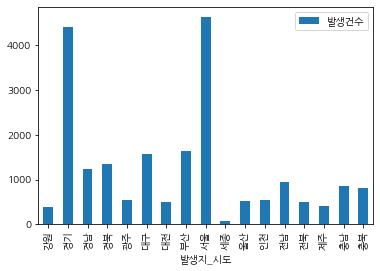

In [11]:
a2.plot(kind='bar')

### 시도별 사고 발생률

In [12]:
a2 = a1.sort_values(by=['발생건수'],ascending=False)
a2

,발생지_시도,발생건수
8,서울,4625
1,경기,4412
7,부산,1645
5,대구,1559
3,경북,1355
2,경남,1232
12,전남,940
15,충남,847
16,충북,808
11,인천,552


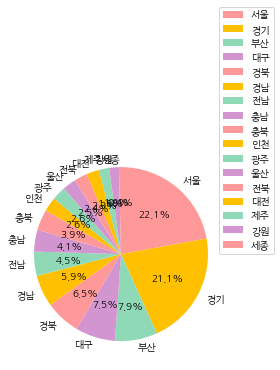

In [13]:
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']

plt.pie(a2['발생건수'],labels=a2['발생지_시도'],autopct='%.1f%%', 
        startangle=90, counterclock=False, colors=colors)
plt.legend(loc=(0.95,0.5))
plt.show()

### 월별 사고 발생 건수

In [14]:
mon = df.groupby('발생일')
mon1 = mon.size().reset_index(name="발생건수")
mon2 = mon1.set_index('발생일')
mon2

,발생건수
발생일,
1,1283
2,1199
3,1503
4,1730
5,2026
6,1873
7,1885
8,2025
9,1873


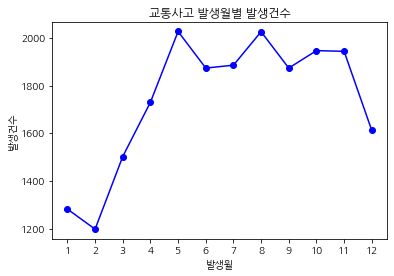

In [15]:
plt.xlabel('발생월', fontsize=10)
plt.ylabel('발생건수', fontsize=10)
plt.title('교통사고 발생월별 발생건수')

plt.xticks(np.arange(1,13))
plt.plot(mon1['발생일'],mon1['발생건수'], 'bo-')
plt.show()

### 요일별 사고 발생 건수

In [16]:
df = pd.read_csv('./two-wheeled_2019.csv', encoding='cp949')

df['발생일'] = pd.to_datetime(df['발생일'], format="%Y-%m-%d")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20898 entries, 0 to 20897
Data columns (total 46 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   발생일           20898 non-null  datetime64[ns]
 1   발생시간          20898 non-null  object        
 2   주야            20898 non-null  object        
 3   요일            20898 non-null  object        
 4   사고내용          20898 non-null  object        
 5   발생지_시도        20898 non-null  object        
 6   발생지_시군구       20898 non-null  object        
 7   사고유형_대분류      20898 non-null  object        
 8   사고유형_중분류      20898 non-null  object        
 9   사고유형          20898 non-null  object        
 10  가해자면허경과년수     20898 non-null  object        
 11  가해자법규위반       20898 non-null  object        
 12  가해자성별         20898 non-null  object        
 13  가해자연령         20898 non-null  object        
 14  가해자신체상해정도     20898 non-null  object        
 15  가해차종          20898 non-null  object

In [17]:
df['weekday'] = df['발생일'].dt.weekday
df.head()

,발생일,발생시간,주야,요일,사고내용,발생지_시도,발생지_시군구,사고유형_대분류,사고유형_중분류,사고유형,...,교차로형태,노면상태_대분류,노면상태,기상상태,어린이보호구역여부,사망자수,중상자수,경상자수,부상신고자수,weekday
0,2019-01-01,0:00,야,화,경상,서울,구로구,차대차,추돌,추돌,...,교차로아님,포장,건조,맑음,N,0,0,1,0,1
1,2019-01-01,1:00,야,화,부상신고,경기,부천시,차대차,기타,기타,...,교차로 - 사지,포장,건조,맑음,N,0,0,0,1,1
2,2019-01-01,1:00,야,화,경상,경기,부천시,차대사람,횡단중,횡단중,...,교차로 - 삼지,포장,건조,맑음,N,0,0,1,0,1
3,2019-01-01,6:00,주,화,중상,인천,서구,차대차,추돌,추돌,...,교차로아님,포장,건조,맑음,N,0,1,0,0,1
4,2019-01-01,10:00,주,화,경상,광주,광산구,차대차,측면충돌,측면충돌,...,교차로 - 사지,포장,건조,맑음,N,0,0,3,0,1


In [18]:
df_day = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']
def days(x):
    return df_day[x]

gb_day = df.groupby('weekday').size().reset_index(name="사고건수")
gb_day['weekday'] = gb_day['weekday'].apply(days)
gb_days=gb_day.set_index('weekday')
gb_days

,사고건수
weekday,
월요일,2930
화요일,2954
수요일,2967
목요일,2944
금요일,3188
토요일,3170
일요일,2745


<AxesSubplot:xlabel='weekday'>

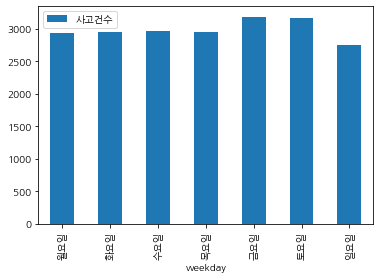

In [19]:
gb_days.plot(kind='bar')

### 발생시간대별 사고 발생 건수

In [20]:
def get_time(x):
    return x[:-3]

In [21]:
df['발생시간'] = df['발생시간'].apply(get_time)

In [45]:
df.head()

,발생일,발생시간,주야,요일,사고내용,발생지_시도,발생지_시군구,사고유형_대분류,사고유형_중분류,사고유형,...,교차로형태,노면상태_대분류,노면상태,기상상태,어린이보호구역여부,사망자수,중상자수,경상자수,부상신고자수,weekday
0,2019-01-01,0,야,화,경상,서울,구로구,차대차,추돌,추돌,...,교차로아님,포장,건조,맑음,N,0,0,1,0,1
1,2019-01-01,1,야,화,부상신고,경기,부천시,차대차,기타,기타,...,교차로 - 사지,포장,건조,맑음,N,0,0,0,1,1
2,2019-01-01,1,야,화,경상,경기,부천시,차대사람,횡단중,횡단중,...,교차로 - 삼지,포장,건조,맑음,N,0,0,1,0,1
3,2019-01-01,6,주,화,중상,인천,서구,차대차,추돌,추돌,...,교차로아님,포장,건조,맑음,N,0,1,0,0,1
4,2019-01-01,10,주,화,경상,광주,광산구,차대차,측면충돌,측면충돌,...,교차로 - 사지,포장,건조,맑음,N,0,0,3,0,1


In [22]:
# 데이터타입 변경 
## 문자열을 숫자형으로
df = df.astype({'발생시간':int})

In [23]:
df_time = df.groupby('발생시간').size().reset_index(name="사고건수")
df_times = df_time.set_index('발생시간')
df_times

,사고건수
발생시간,
0,491
1,394
2,328
3,215
4,204
5,269
6,322
7,414
8,615


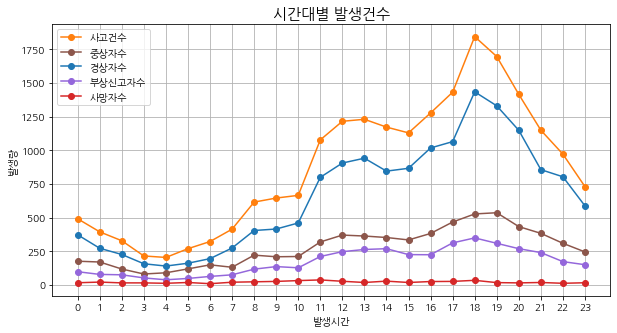

In [24]:
df_t1 = df.groupby('발생시간')['중상자수'].sum()
df_t2 = df.groupby('발생시간')['경상자수'].sum()
df_t3 = df.groupby('발생시간')['부상신고자수'].sum()
df_t4 = df.groupby('발생시간')['사망자수'].sum()

plt.figure(figsize=(10,5)) # 그래프 크기
plt.title("시간대별 발생건수", fontsize=15) #타이틀
plt.xlabel("발생시간")
plt.ylabel("발생량")

plt.plot(df_times, color='#ff7f0e', marker="o", label='사고건수') # 라인 색상, 
plt.legend()
plt.plot(df_t1, color='#8c564b', marker='o', label='중상자수')#, linewidth=2 선 굵기
plt.legend()
plt.plot(df_t2, color='#1f77b4', marker='o', label='경상자수')#, linewidth=2 선 굵기
plt.legend()
plt.plot(df_t3, color='#9467db', marker='o', label='부상신고자수')#, linewidth=2 선 굵기
plt.legend()
plt.plot(df_t4, color='#d62728', marker='o', label='사망자수')#, linewidth=2 선 굵기
plt.legend()

plt.xticks(np.arange(0,24)) # x값 출력
plt.grid()
plt.show()

### 가해자 연령대별 사고 발생 건수

In [25]:
def get_page(x):
    return x[:-1]

In [26]:
df['가해자연령'] = df['가해자연령'].apply(get_page)
df.head()

,발생일,발생시간,주야,요일,사고내용,발생지_시도,발생지_시군구,사고유형_대분류,사고유형_중분류,사고유형,...,교차로형태,노면상태_대분류,노면상태,기상상태,어린이보호구역여부,사망자수,중상자수,경상자수,부상신고자수,weekday
0,2019-01-01,0,야,화,경상,서울,구로구,차대차,추돌,추돌,...,교차로아님,포장,건조,맑음,N,0,0,1,0,1
1,2019-01-01,1,야,화,부상신고,경기,부천시,차대차,기타,기타,...,교차로 - 사지,포장,건조,맑음,N,0,0,0,1,1
2,2019-01-01,1,야,화,경상,경기,부천시,차대사람,횡단중,횡단중,...,교차로 - 삼지,포장,건조,맑음,N,0,0,1,0,1
3,2019-01-01,6,주,화,중상,인천,서구,차대차,추돌,추돌,...,교차로아님,포장,건조,맑음,N,0,1,0,0,1
4,2019-01-01,10,주,화,경상,광주,광산구,차대차,측면충돌,측면충돌,...,교차로 - 사지,포장,건조,맑음,N,0,0,3,0,1


In [27]:
df['가해자연령'] = df['가해자연령'].replace('불', '') # '불' 공백으로
df['가해자연령'].sort_values()

10523      
19567      
3863       
5490       
16365      
         ..
12566    93
20458    93
18673    93
20503    93
1485     95
Name: 가해자연령, Length: 20898, dtype: object

In [28]:
df['가해자연령'] = pd.to_numeric(df['가해자연령']) #숫자형으로 변경
df['가해자연령']  

0        23.0
1        56.0
2        17.0
3        45.0
4        17.0
         ... 
20893    30.0
20894    16.0
20895    41.0
20896    57.0
20897    30.0
Name: 가해자연령, Length: 20898, dtype: float64

In [29]:
df['가해자연령'].sort_values()

16268    10.0
11697    11.0
7302     11.0
4843     11.0
4370     13.0
         ... 
18627     NaN
19567     NaN
19715     NaN
20313     NaN
20547     NaN
Name: 가해자연령, Length: 20898, dtype: float64

In [30]:
import math

def age_cate(age):
    if math.isnan(age):
        return '불명'
    else:
        firstage = age/10
        if firstage < 9 :
            return str(int(firstage)) + '0대'
        else:
            return '90세 이상'

In [31]:
df['가해자연령'] = df['가해자연령'].apply(age_cate)
df['가해자연령']

0        20대
1        50대
2        10대
3        40대
4        10대
        ... 
20893    30대
20894    10대
20895    40대
20896    50대
20897    30대
Name: 가해자연령, Length: 20898, dtype: object

In [32]:
df['가해자연령'].sort_values()

13622    10대
5129     10대
15167    10대
5128     10대
5126     10대
        ... 
9272      불명
8241      불명
8928      불명
11941     불명
5280      불명
Name: 가해자연령, Length: 20898, dtype: object

In [33]:
age = df.groupby('가해자연령')
age.sum()

,발생시간,사망자수,중상자수,경상자수,부상신고자수,weekday
가해자연령,,,,,,
10대,46035,46,997,2498,705,9541
20대,73358,83,1462,3990,1087,15536
30대,50991,63,1024,2615,690,10627
40대,39984,35,825,2045,525,8231
50대,37221,50,843,1861,462,7493
60대,25077,55,664,1223,316,4998
70대,19934,91,589,988,227,4207
80대,8806,73,275,391,121,1917
90세 이상,269,2,6,16,4,64


In [34]:
age_1 = df.groupby('가해자연령').size().reset_index(name="발생건수")
age_1

,가해자연령,발생건수
0,10대,3070
1,20대,4963
2,30대,3419
3,40대,2678
4,50대,2560
5,60대,1823
6,70대,1582
7,80대,718
8,90세 이상,24
9,불명,61


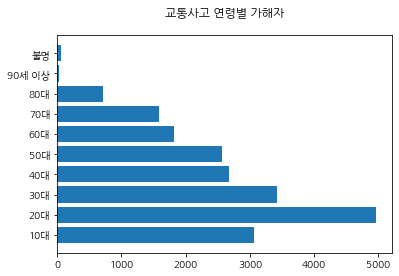

In [35]:
plt.barh(age_1['가해자연령'], age_1['발생건수'])
plt.title('교통사고 연령별 가해자', pad=20)
plt.show()

### 사고 유형별 가해자 신체 사고내용

In [36]:
stacked_bar_df = df.groupby(["사고유형_대분류","사고내용"]).size().unstack()
stacked_bar_df

사고내용,경상,부상신고,사망,중상
사고유형_대분류,,,,
차대사람,1714.0,187.0,33.0,1473.0
차대차,8690.0,2484.0,254.0,3929.0
차량단독,706.0,434.0,201.0,792.0
철길건널목,NaN,NaN,NaN,1.0


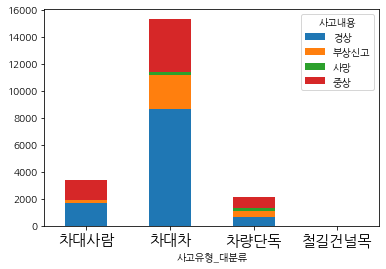

In [37]:
stacked_bar_df.plot(kind='bar', stacked=True)
plt.xticks(rotation=0, fontsize=15)
plt.show()

### 가해자 음주농도에 따른 피해자 신체상해 정도

In [38]:
star_df = df.groupby(["가해자음주농도","피해자신체상해정도"]).size().unstack()
star_df

피해자신체상해정도,경상,기타불명,부상신고,사망,상해없음,없음,중상
가해자음주농도,,,,,,,
0.030~0.049%,22.0,1.0,NaN,NaN,15.0,11.0,5.0
0.05%~0.09%,81.0,10.0,2.0,NaN,66.0,124.0,26.0
0.10%~0.14%,128.0,16.0,11.0,NaN,106.0,267.0,41.0
0.15%~0.19%,67.0,13.0,5.0,1.0,79.0,161.0,9.0
0.20%~0.24%,30.0,3.0,1.0,NaN,20.0,74.0,6.0
0.25%~0.29%,6.0,NaN,2.0,NaN,11.0,15.0,1.0
0.30%~0.34%,2.0,NaN,NaN,NaN,1.0,8.0,1.0
0.35%이상,NaN,NaN,NaN,NaN,1.0,3.0,NaN
측정불응,6.0,2.0,NaN,NaN,9.0,16.0,1.0


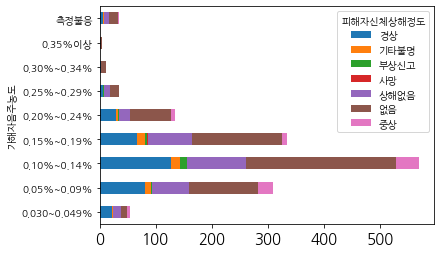

In [39]:
star_df.plot(kind='barh', stacked=True)
plt.xticks(rotation=0, fontsize=15)
plt.show()

### 가해자 면허 경과년수에 따른 사고률

In [40]:
df_bar3=df.groupby('가해자면허경과년수')[['사망자수','중상자수','경상자수','부상신고자수']].sum().reset_index()
df_bar3

,가해자면허경과년수,사망자수,중상자수,경상자수,부상신고자수
0,10년미만,58,921,2260,572
1,15년미만,45,571,1496,345
2,15년이상,217,2870,6455,1702
3,1년미만,23,535,1444,389
4,2년미만,17,296,809,251
5,3년미만,19,230,704,178
6,4년미만,18,203,561,156
7,5년미만,10,223,472,150
8,기타/불명,91,846,1470,405


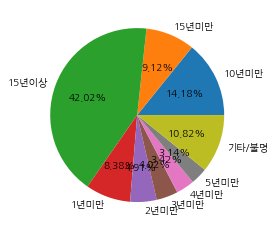

In [41]:
ratio3=df.groupby('가해자면허경과년수').size()
labels3 = df_bar3['가해자면허경과년수']

plt.pie(ratio3, labels=labels3, autopct='%.2f%%')
plt.show()

### 가해자 법규위반에 따른 사고률

In [42]:
df_s = df.groupby('가해자법규위반').size().reset_index(name="사고건수")
df_s

,가해자법규위반,사고건수
0,과속,63
1,교차로 통행방법 위반,1130
2,기타,1755
3,보행자 보호의무 위반,435
4,신호위반,4160
5,안전거리 미확보,1415
6,안전운전 의무 불이행,10949
7,중앙선 침범,991


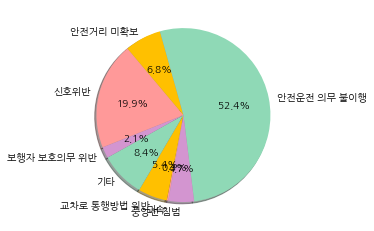

In [43]:
ratio2 = df_s['사고건수']
labels2 = df_s['가해자법규위반']
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']

plt.pie(ratio2, labels=labels2, autopct='%.1f%%', startangle=260, counterclock=False, shadow=True, colors=colors)
plt.show()